$$- - -$$

# COVID-19 Data

## Table of Contents

### 1. Introduction
* 1.1 Installing Packages, Loading Libraries
* 1.2 Reading in and Cleaning the Data
* 1.3 Background on Data Set
* 1.4 Visualizing the Data

### 2. Data Observations
* 2.1 Exploratory Analysis
* 2.2 Initial Observations

...

### 1.1 Installing Packages, Loading Libraries

In [5]:
library(tidyverse)
library(digest)
library(repr)
library(taxyvr)
library(caret)
library(grid)
library(infer)

### 1.2 Reading in and Cleaning the Data

In [28]:
covid_19_data_full <- read_csv("covid19data.csv", col_names = TRUE)

Parsed with column specification:
cols(
  .default = col_double(),
  prname = col_character(),
  prnameFR = col_character(),
  date = col_date(format = ""),
  update = col_logical(),
  numtests = col_logical(),
  percentrecover = col_character(),
  ratetests = col_logical(),
  numteststoday = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“1332 parsing failures.
 row           col           expected  actual              file
4948 numtests      1/0/T/F/TRUE/FALSE 1710926 'covid19data.csv'
4948 ratetests     1/0/T/F/TRUE/FALSE 332366  'covid19data.csv'
4948 numteststoday 1/0/T/F/TRUE/FALSE 1710926 'covid19data.csv'
4949 numtests      1/0/T/F/TRUE/FALSE 3164628 'covid19data.csv'
4949 ratetests     1/0/T/F/TRUE/FALSE 715675  'covid19data.csv'
.... ............. .................. ....... .................
See problems(...) for more details.
”


In [31]:
head(covid_19_data_full)

pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,⋯,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
<dbl>,<chr>,<chr>,<date>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,Ontario,Ontario,2020-01-31,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
59,British Columbia,Colombie-Britannique,2020-01-31,NA,1,0,0,1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Canada,Canada,2020-01-31,NA,4,0,0,4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
35,Ontario,Ontario,2020-02-08,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
59,British Columbia,Colombie-Britannique,2020-02-08,NA,4,0,0,4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,Canada,Canada,2020-02-08,NA,7,0,0,7,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### 1.3 Background on Data Set

Source: 
* https://health-infobase.canada.ca/covid-19/dashboard/
* https://health-infobase.canada.ca/covid-19/dashboard/about.html


In [33]:
summary(covid_19_data_full)

     pruid          prname            prnameFR              date           
 Min.   : 1.00   Length:5412        Length:5412        Min.   :2020-01-31  
 1st Qu.:12.00   Class :character   Class :character   1st Qu.:2020-06-05  
 Median :46.00   Mode  :character   Mode  :character   Median :2020-09-03  
 Mean   :39.12                                         Mean   :2020-09-02  
 3rd Qu.:60.00                                         3rd Qu.:2020-12-02  
 Max.   :99.00                                         Max.   :2021-03-02  
                                                                           
   update           numconf          numprob          numdeaths    
 Mode :logical   Min.   :     0   Min.   :  0.000   Min.   :    0  
 FALSE:94        1st Qu.:    27   1st Qu.:  0.000   1st Qu.:    0  
 TRUE :803       Median :   408   Median :  0.000   Median :    7  
 NA's :4515      Mean   : 34799   Mean   :  1.213   Mean   : 1339  
                 3rd Qu.: 18322   3rd Qu.:  0.000   

# BC Data

In [34]:
covid_19_data_bc <- covid_19_data_full %>% filter(prname == "British Columbia")

In [36]:
dim(covid_19_data_bc)

[1] 373  39

# BC Data Deaths

In [60]:
covid_19_data_bc_deaths <- covid_19_data_bc %>% select(date, numdeathstoday)
head(covid_19_data_bc_deaths)

date,numdeathstoday
<date>,<dbl>
2020-01-31,0
2020-02-08,0
2020-02-16,0
2020-02-21,0
2020-02-24,0
2020-02-25,0


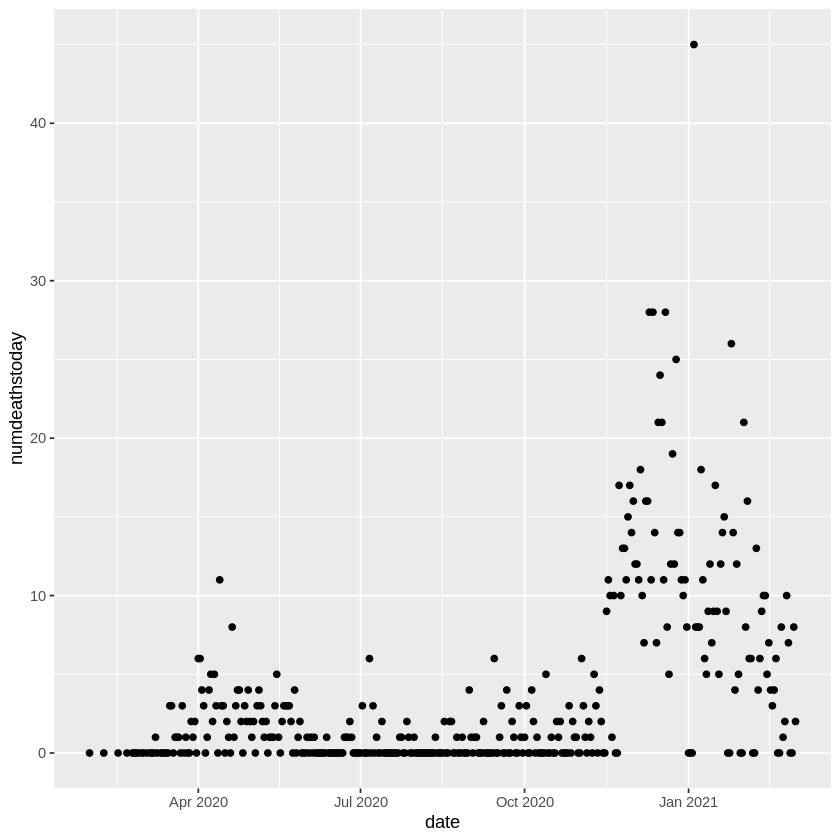

In [78]:
covid_19_data_bc_deaths_plot <- ggplot(covid_19_data_bc_deaths, aes(x=date, y=numdeathstoday)) + geom_point()
covid_19_data_bc_deaths_plot

# BC Data Cases

In [80]:
covid_19_data_bc_cases <- covid_19_data_bc %>% select(date, numtoday)
head(covid_19_data_bc_cases)

date,numtoday
<date>,<dbl>
2020-01-31,1
2020-02-08,3
2020-02-16,1
2020-02-21,1
2020-02-24,0
2020-02-25,1


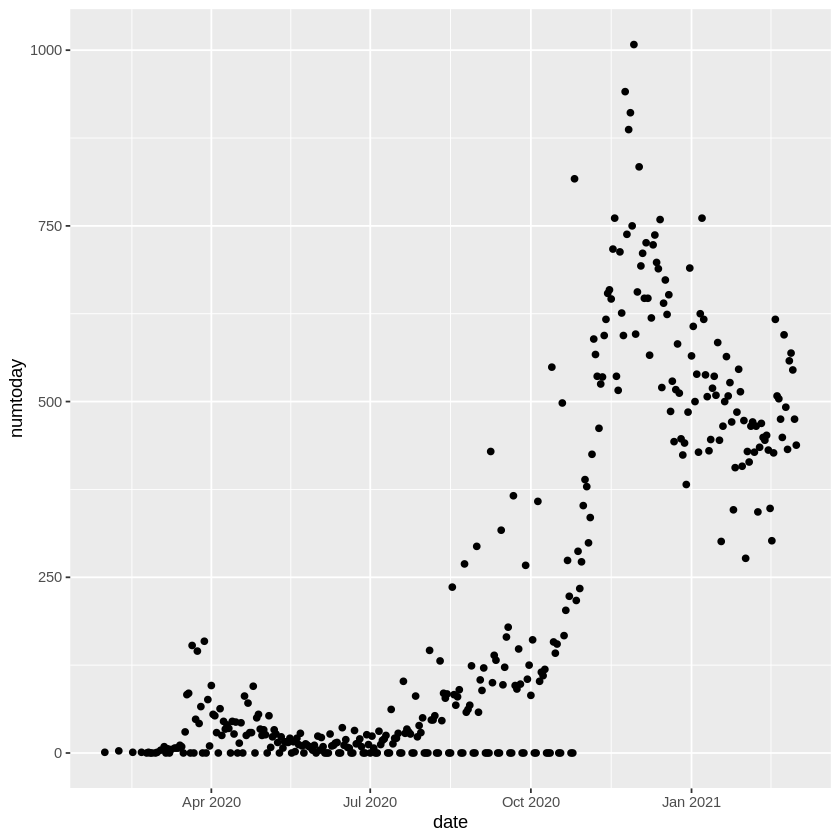

In [81]:
covid_19_data_bc_cases_plot <- ggplot(covid_19_data_bc_cases, aes(x=date, y=numtoday)) + 
    geom_point() +
    xlab("Date") +
    ylab("Number of Cases") 
covid_19_data_bc_cases_plot

In [82]:
covid_19_data_bc_deaths_percent <- covid_19_data_bc %>% select(date, percentdeath)
head(covid_19_data_bc_deaths_percent)

date,percentdeath
<date>,<dbl>
2020-01-31,0
2020-02-08,0
2020-02-16,0
2020-02-21,0
2020-02-24,0
2020-02-25,0


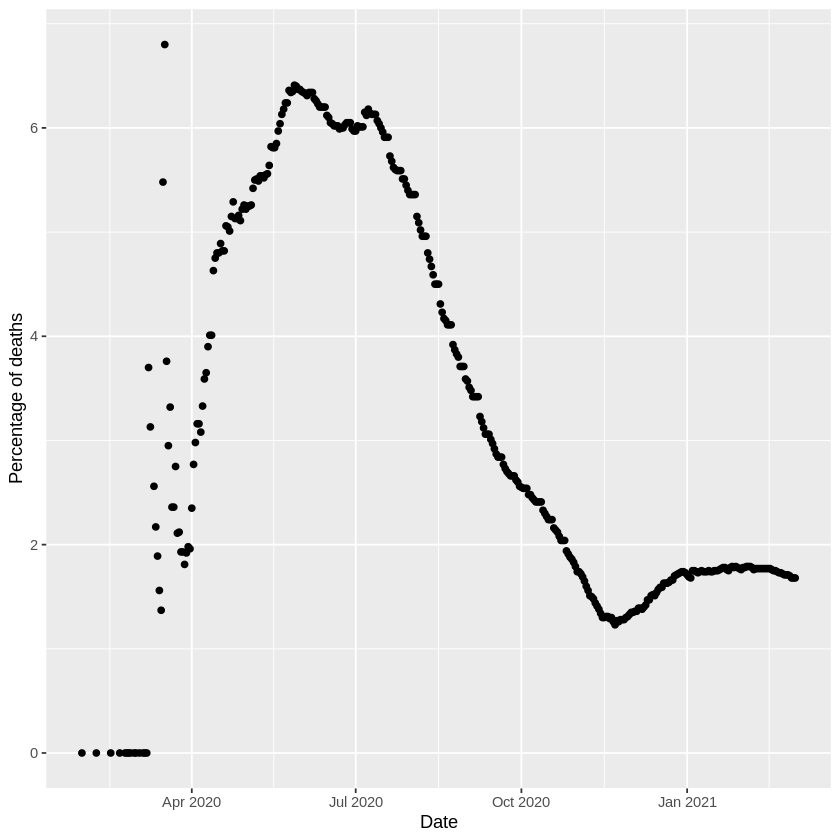

In [88]:
covid_19_data_bc_deaths_percent_plot <- ggplot(covid_19_data_bc_deaths_percent, aes(x=date, y=percentdeath)) +
    geom_point() +
    xlab("Date") +
    ylab("Percentage of deaths") 

covid_19_data_bc_deaths_percent_plot

In [95]:
covid_19_data_bc_cases_deaths <- covid_19_data_bc %>% select(numtoday, numdeathstoday)
head(covid_19_data_bc_cases_deaths)
dim(covid_19_data_bc_cases_deaths)

numtoday,numdeathstoday
<dbl>,<dbl>
1,0
3,0
1,0
1,0
0,0
1,0


[1] 373   2

# See Correlation Between Cases and Deaths

In [85]:
install.packages("gridExtra")
install.packages("GGally")
library(gridExtra)
library(GGally)

Warning message in install.packages("gridExtra"):
“installation of package ‘gridExtra’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [98]:
ggpair_plot <- ggpairs(covid_19_data_bc_cases_deaths)

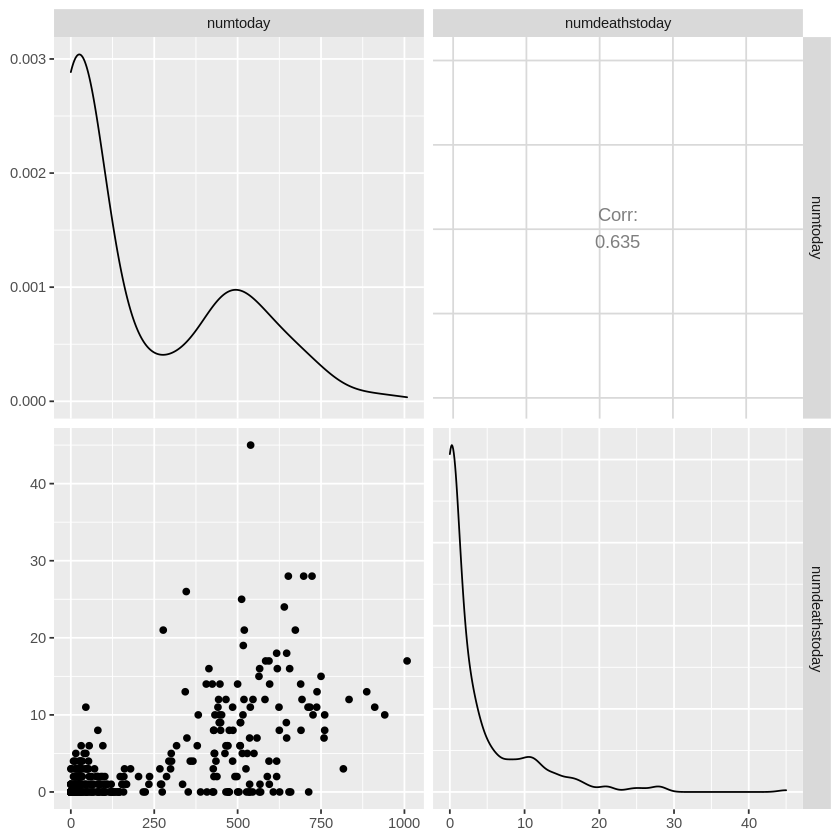

In [100]:
ggpair_plot